In [1]:
# Importing necessary packages

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import rfft, rfftfreq
import os 
import cv2

In [2]:
# Using Pandas to convert excel file to csv then converting it to numpy array

read_file = pd.read_excel(r"D:\AMLAN\Fractal Analysis\Data\new data\normal.xlsx")

read_file.to_csv(r"D:\AMLAN\Fractal Analysis\Data\new data\normal.csv", index=None, header=True)

normal = pd.read_csv(r"D:\AMLAN\Fractal Analysis\Data\new data\normal.csv")
normal = np.array(normal)
print(normal.shape)

read_file = pd.read_excel(r"D:\AMLAN\Fractal Analysis\Data\new data\cancer.xlsx")

read_file.to_csv(r"D:\AMLAN\Fractal Analysis\Data\new data\cancer.csv", index=None, header=True)

cancer = pd.read_csv(r"D:\AMLAN\Fractal Analysis\Data\new data\cancer.csv")
cancer = np.array(cancer)
print(cancer.shape)

read_file = pd.read_excel(r"D:\AMLAN\Fractal Analysis\Data\new data\precancer.xlsx")

read_file.to_csv(r"D:\AMLAN\Fractal Analysis\Data\new data\precancer.csv", index=None, header=True)

precancer = pd.read_csv(r"D:\AMLAN\Fractal Analysis\Data\new data\precancer.csv")
precancer = np.array(precancer)
print(precancer.shape)

(230, 222)
(230, 33)
(230, 137)


In [3]:
# Calculating cumsum of the signal 

cumsum_normal = np.cumsum(normal - np.mean(normal))
cumsum_precancer = np.cumsum(precancer - np.mean(precancer))
cumsum_cancer = np.cumsum(cancer - np.mean(cancer))

C:\Users\Swosti\AppData\Local\Temp\ipykernel_4144\2067769698.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Swosti\AppData\Local\Temp\ipykernel_4144\2067769698.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Swosti\AppData\Local\Temp\ipykernel_4144\2067769698.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


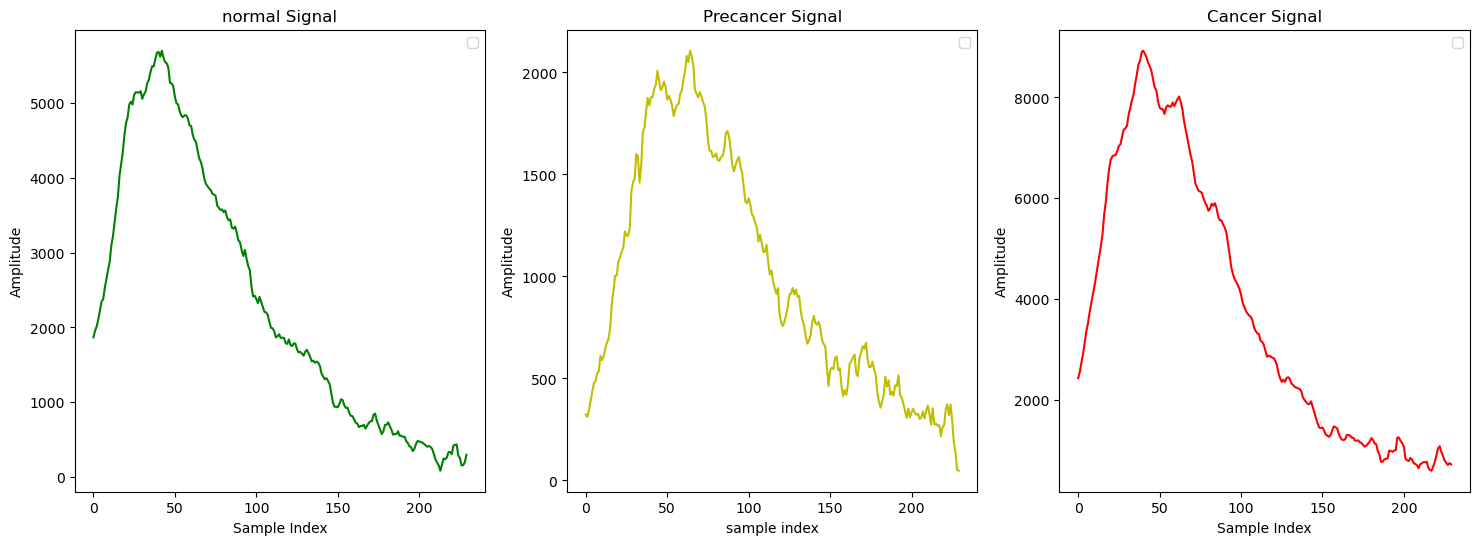

In [4]:
# Plotting all three signals 

plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
plt.plot(normal[:,1], color="g")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("normal Signal")
plt.legend()

plt.subplot(1,3,2)
plt.plot(precancer[:,1], color="y")
plt.xlabel("sample index")
plt.ylabel("Amplitude")
plt.title("Precancer Signal")   
plt.legend()

plt.subplot(1,3,3)
plt.plot(cancer[:,1], color="r") 
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("Cancer Signal")
plt.legend()


plt.show()

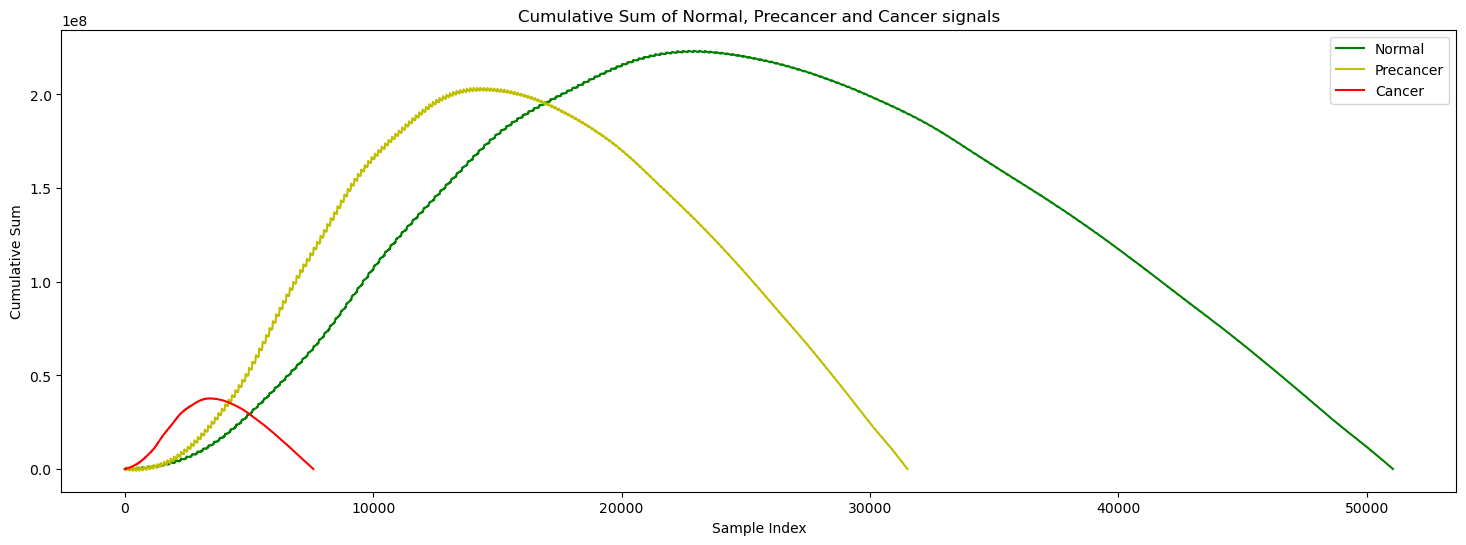

In [5]:
# Plotting cumsum of all three cumsum data
plt.figure(figsize = (18, 6))

plt.plot(cumsum_normal, "g", cumsum_precancer, "y", cumsum_cancer, "r")
plt.xlabel("Sample Index")
plt.ylabel("Cumulative Sum")
plt.title("Cumulative Sum of Normal, Precancer and Cancer signals")
plt.legend(["Normal", "Precancer", "Cancer"])
plt.show()

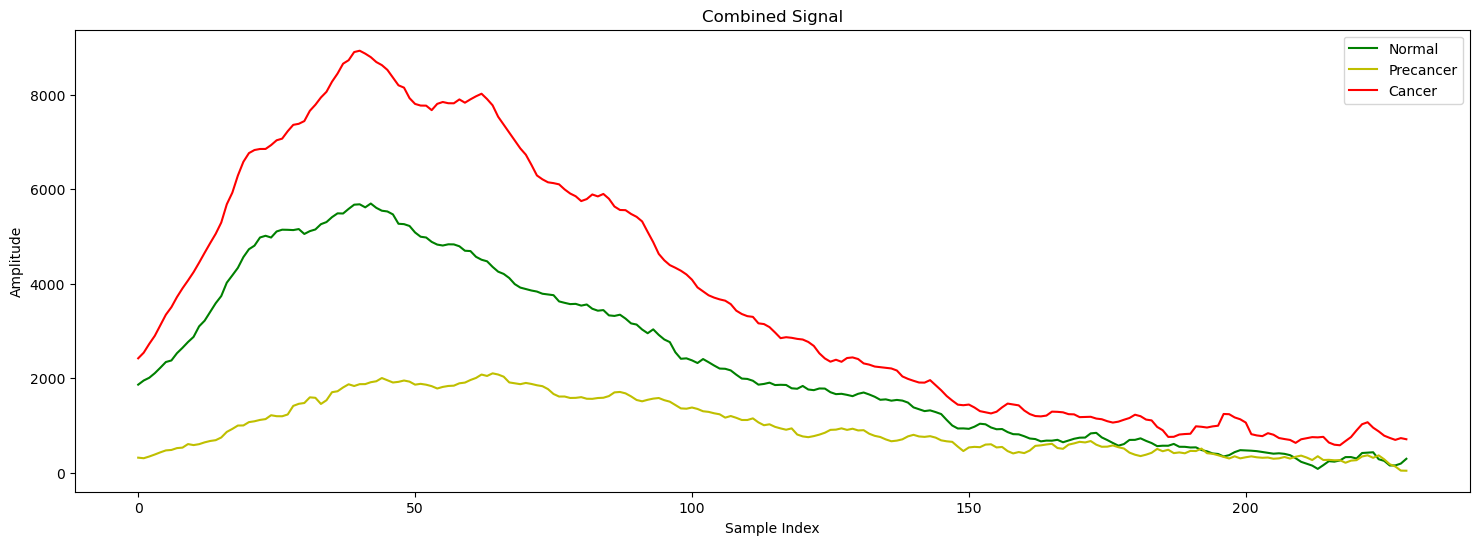

In [6]:
plt.figure(figsize=(18, 6))

#Ploting the all three signal in one plot
plt.plot(normal[:,1], color="g")             # plt.plot(normal[:,1], color="g", precancer[: ,1]. "y", cancer[:,1],"r")     One line code for all three signal
plt.plot(precancer[:,1], color="y")
plt.plot(cancer[:,1], color="r")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("Combined Signal")
plt.legend(["Normal", "Precancer", "Cancer"])
plt.show()

In [7]:
print(normal.size)

51060


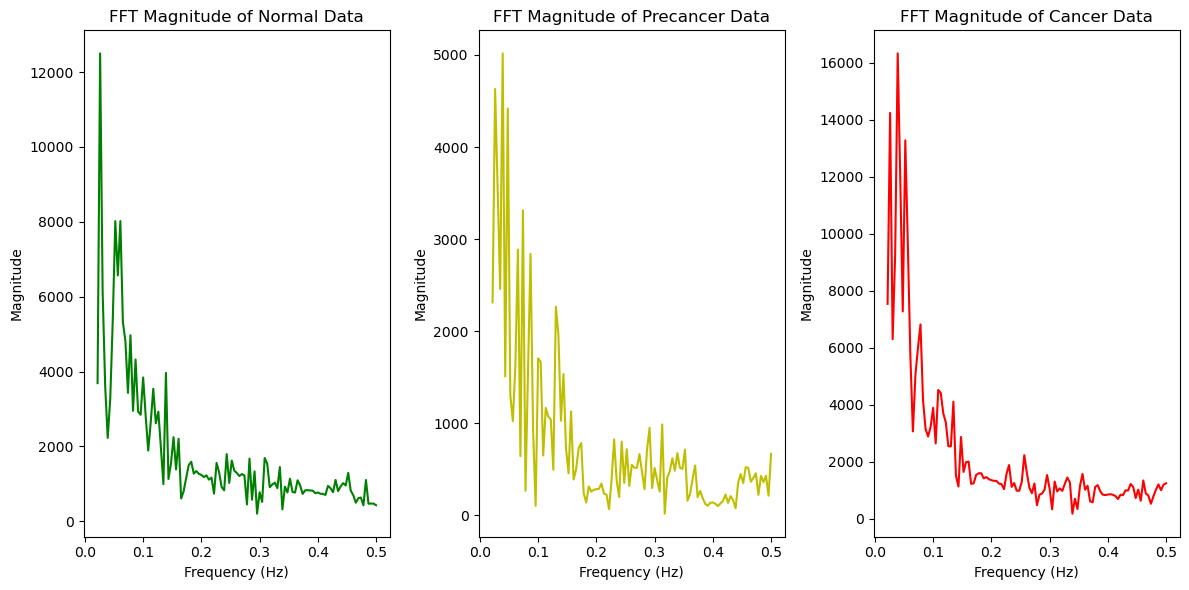

In [8]:
# Defining deltaT (Sampling interval)

deltaT=1  # It sets interval to 1 unit

# Taking fourier transform of each signal using rfft

fft_normal_data= rfft(normal[:,1])
fft_normal_freq = rfftfreq(len(normal[:,1]), deltaT)

fft_precancer_data= rfft(precancer[:,1])
fft_precancer_freq = rfftfreq(len(precancer[:,1]), deltaT)

fft_cancer_data = rfft(cancer[:,1])
fft_cancer_freq = rfftfreq(len(cancer[:,1]), deltaT)

# Plotting the magnitude vs frequrncy of the signals

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(fft_normal_freq[5:], np.abs(fft_normal_data[5:]), 'g')
plt.title("FFT Magnitude of Normal Data")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.subplot(1, 3, 2)
plt.plot(fft_precancer_freq[5:], np.abs(fft_precancer_data[5:]), 'y')
plt.title("FFT Magnitude of Precancer Data")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.subplot(1, 3, 3)
plt.plot(fft_cancer_freq[5:], np.abs(fft_cancer_data[5:]), 'r')
plt.title("FFT Magnitude of Cancer Data")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

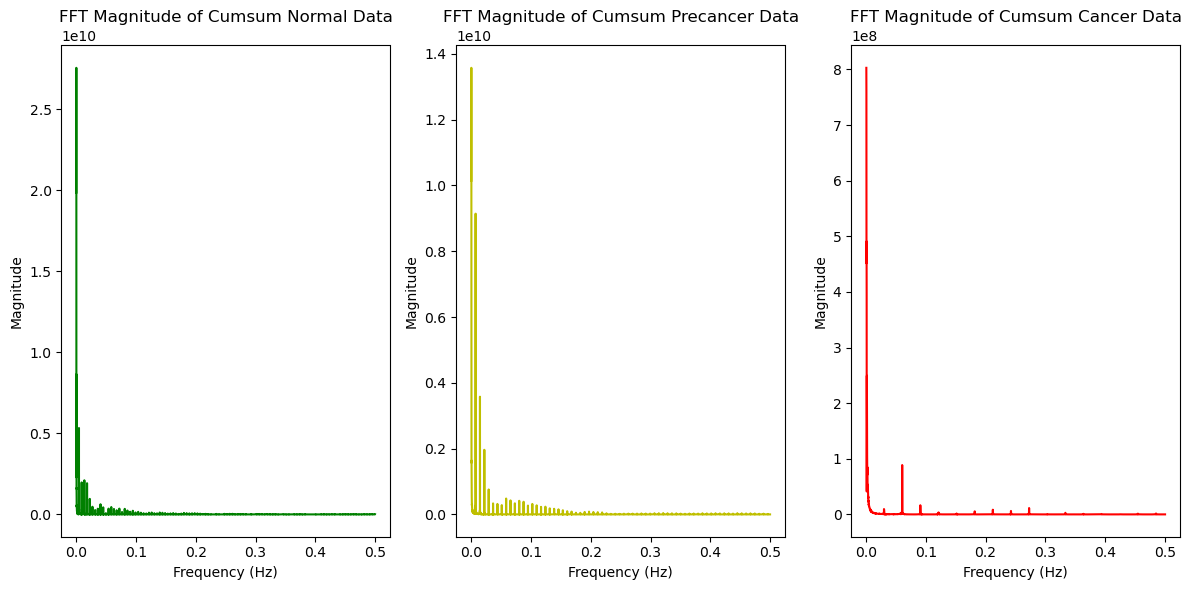

In [9]:
# Define deltaT (Sampling interval)

deltaT=1

# Doing fourier transform of the cumsum of the signals using rfft

fft_cumsum_normal_data= rfft(cumsum_normal[:])
fft_cumsum_normal_freq = rfftfreq(len(cumsum_normal[:]), deltaT)

fft_cumsum_precancer_data= rfft(cumsum_precancer[:])
fft_cumsum_precancer_freq = rfftfreq(len(cumsum_precancer[:]), deltaT)

fft_cumsum_cancer_data = rfft(cumsum_cancer[:])
fft_cumsum_cancer_freq = rfftfreq(len(cumsum_cancer[:]), deltaT)



# Plotting the magnitude vs frequency of the cumsum of the signals

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(fft_cumsum_normal_freq[5:], np.abs(fft_cumsum_normal_data[5:]), 'g')
plt.title("FFT Magnitude of Cumsum Normal Data")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.subplot(1, 3, 2)
plt.plot(fft_cumsum_precancer_freq[5:], np.abs(fft_cumsum_precancer_data[5:]), 'y')
plt.title("FFT Magnitude of Cumsum Precancer Data")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.subplot(1, 3, 3)
plt.plot(fft_cumsum_cancer_freq[5:], np.abs(fft_cumsum_cancer_data[5:]), 'r')
plt.title("FFT Magnitude of Cumsum Cancer Data")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

In [ ]:
# Importing IPython widget an display module for interactive plot
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display
from scipy.fft import rfft, rfftfreq


# Define deltaT (Sampling interval)
deltaT = 1

# Defining a Function to compute and plot FFT
def plot_fft(column):
    col_idx = int(column.split('_')[1]) - 1  # It extracts column index from name
    
    # Calculating  FFT for each column
    fft_normal_data = rfft(normal[:, col_idx])
    fft_normal_freq = rfftfreq(len(normal[:, col_idx]), deltaT)

    fft_precancer_data = rfft(precancer[:, col_idx])
    fft_precancer_freq = rfftfreq(len(precancer[:, col_idx]), deltaT)

    fft_cancer_data = rfft(cancer[:, col_idx])
    fft_cancer_freq = rfftfreq(len(cancer[:, col_idx]), deltaT)

    # Plotting
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.plot(fft_normal_freq[5:], np.abs(fft_normal_data[5:]), 'g')
    plt.title(f"FFT of Normal Data (Column {col_idx+1})")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")

    plt.subplot(1, 3, 2)
    plt.plot(fft_precancer_freq[5:], np.abs(fft_precancer_data[5:]), 'y')
    plt.title(f"FFT of Precancer Data (Column {col_idx+1})")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")

    plt.subplot(1, 3, 3)
    plt.plot(fft_cancer_freq[5:], np.abs(fft_cancer_data[5:]), 'r')
    plt.title(f"FFT of Cancer Data (Column {col_idx+1})")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")

    plt.tight_layout()
    plt.show()

# Defining the number of columns in the dataset to minimum number of the column which is in cancer data
num_columns = cancer.shape[1]

# Dropdown widget to select a column
column_dropdown = widgets.Dropdown(
    options=[f"Column_{i+1}" for i in range(num_columns)], 
    description="Column:"
)

# Interactive Output
interactive_plot = widgets.interactive_output(plot_fft, {'column': column_dropdown})

# Display widgets and plot
display(widgets.VBox([column_dropdown, interactive_plot]))


C:\Users\Swosti\AppData\Local\Temp\ipykernel_4144\2507669668.py:6: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(fft_normal_freq), np.log(np.abs(fft_normal_data)), 'g')            # Taking log of the frequency and magnitude for normal signal
C:\Users\Swosti\AppData\Local\Temp\ipykernel_4144\2507669668.py:12: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(fft_precancer_freq), np.log(np.abs(fft_precancer_data)), 'y')      # Taking log of the frequency and magnitude for precancer signal
C:\Users\Swosti\AppData\Local\Temp\ipykernel_4144\2507669668.py:18: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(fft_cancer_freq), np.log(np.abs(fft_cancer_data)), 'r')            # Taking log of the frequency and magnitude for cancer signal


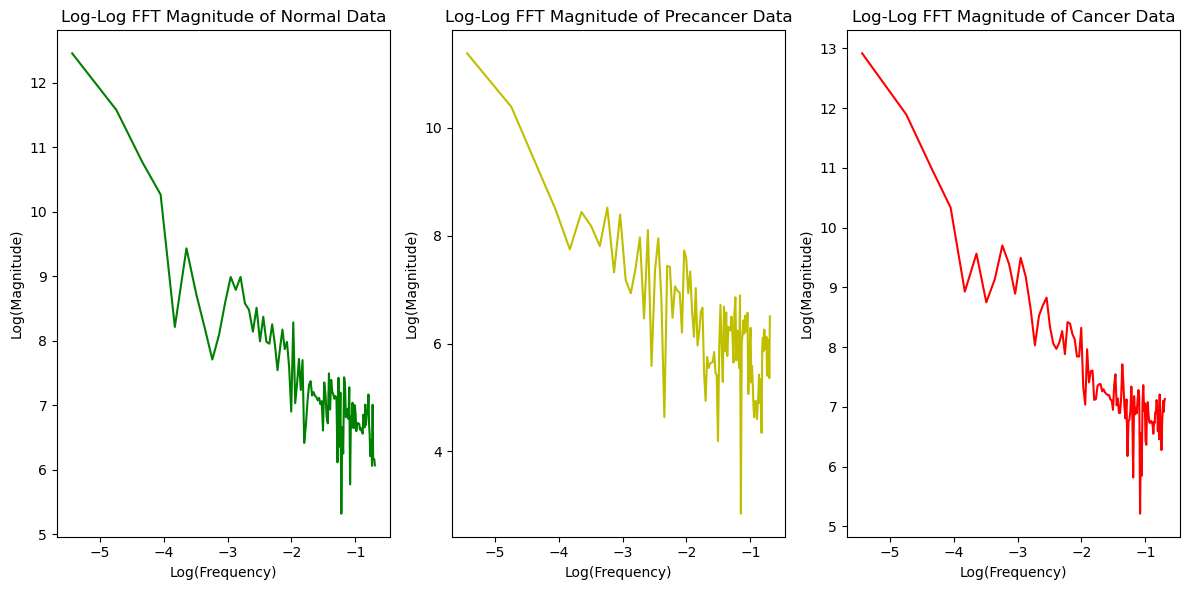

In [11]:

# Plotting the log-log FFT magnitude of the signals

plt.figure(figsize=(12,6))

plt.subplot(1, 3, 1)
plt.plot(np.log(fft_normal_freq), np.log(np.abs(fft_normal_data)), 'g')            # Taking log of the frequency and magnitude for normal signal
plt.title("Log-Log FFT Magnitude of Normal Data")
plt.xlabel("Log(Frequency)")
plt.ylabel("Log(Magnitude)")

plt.subplot(1,3,2)
plt.plot(np.log(fft_precancer_freq), np.log(np.abs(fft_precancer_data)), 'y')      # Taking log of the frequency and magnitude for precancer signal
plt.title("Log-Log FFT Magnitude of Precancer Data")
plt.xlabel("Log(Frequency)")    
plt.ylabel("Log(Magnitude)")

plt.subplot(1,3,3)
plt.plot(np.log(fft_cancer_freq), np.log(np.abs(fft_cancer_data)), 'r')            # Taking log of the frequency and magnitude for cancer signal
plt.title("Log-Log FFT Magnitude of Cancer Data")
plt.xlabel("Log(Frequency)")    
plt.ylabel("Log(Magnitude)")

plt.tight_layout()
plt.show()


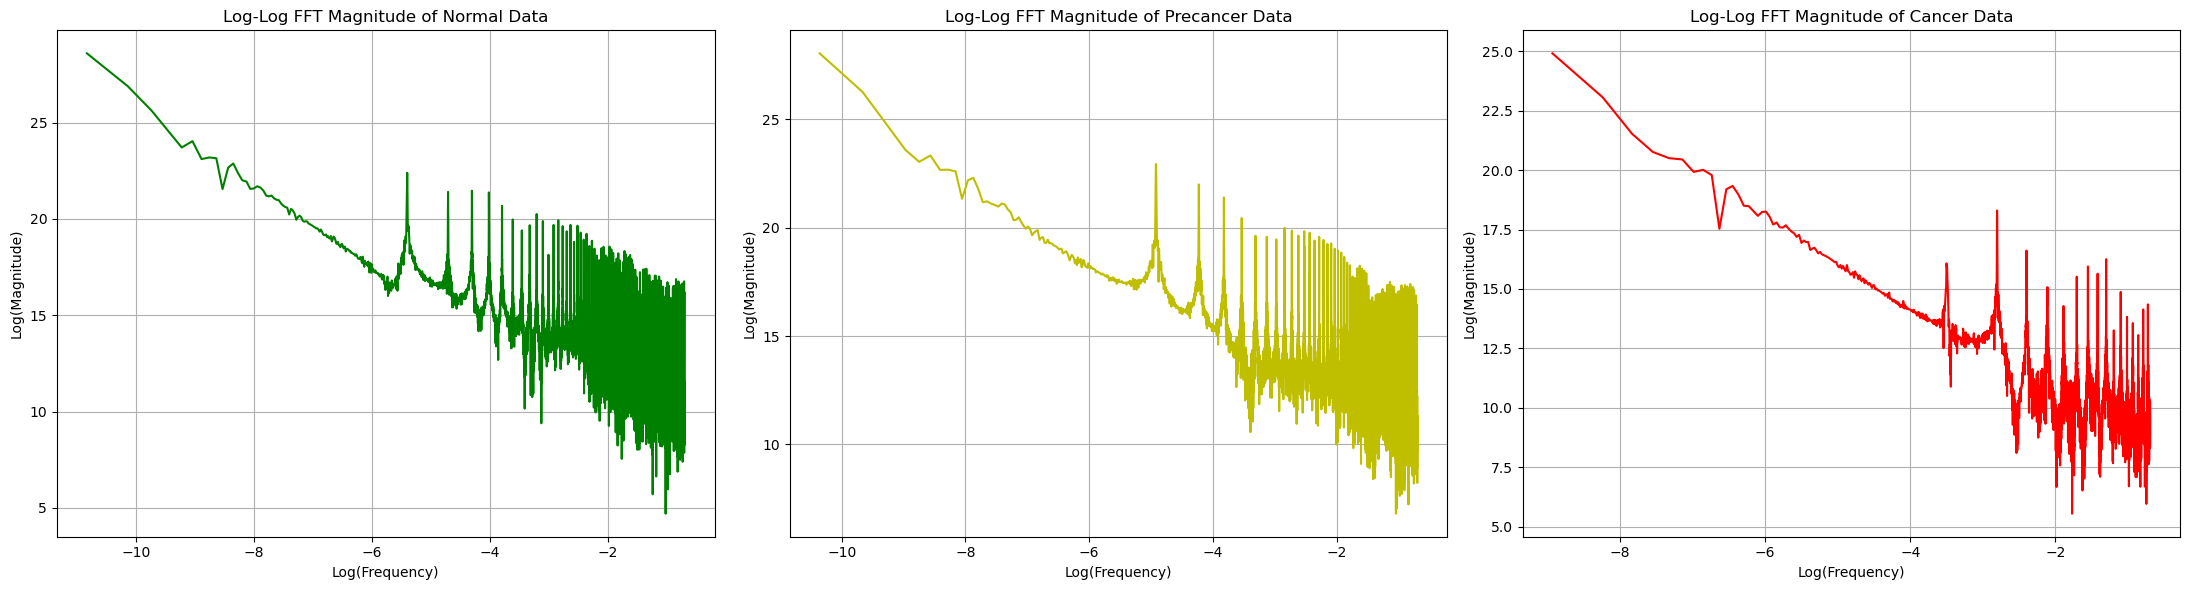

In [ ]:
# Excluding zero values to avoid the log(0) error

nonzero_normal = fft_cumsum_normal_freq > 0
nonzero_precancer = fft_cumsum_precancer_freq > 0
nonzero_cancer = fft_cumsum_cancer_freq > 0

# Plotting the log-log FFT magnitude of the cumsum of the signals

plt.figure(figsize=(22,6))

plt.subplot(1, 3, 1)
plt.plot(np.log(fft_cumsum_normal_freq[nonzero_normal]), np.log(np.abs(fft_cumsum_normal_data[nonzero_normal])), 'g')            # Taking log of the frequency and magnitude for normal signal
plt.title("Log-Log FFT Magnitude of Normal Data")
plt.xlabel("Log(Frequency)")
plt.ylabel("Log(Magnitude)")
plt.grid(True)

plt.subplot(1,3,2)
plt.plot(np.log(fft_cumsum_precancer_freq[nonzero_precancer]), np.log(np.abs(fft_cumsum_precancer_data[nonzero_precancer])), 'y')      # Taking log of the frequency and magnitude for precancer signal
plt.title("Log-Log FFT Magnitude of Precancer Data")
plt.xlabel("Log(Frequency)")    
plt.ylabel("Log(Magnitude)")
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(np.log(fft_cumsum_cancer_freq[nonzero_cancer]), np.log(np.abs(fft_cumsum_cancer_data[nonzero_cancer])), 'r')            # Taking log of the frequency and magnitude for cancer signal
plt.title("Log-Log FFT Magnitude of Cancer Data")
plt.xlabel("Log(Frequency)")    
plt.ylabel("Log(Magnitude)")
plt.grid(True)

plt.tight_layout()

plt.show()


In [ ]:
# Plotting the ineractive log-log FFT magnitude of the signals for all the columns in the dataset

num_columns = normal.shape[1]  

# Define deltaT (Sampling interval)
deltaT = 1

# Function to compute and plot Log-Log FFT
def plot_loglog_fft(column):
    col_idx = int(column.split('_')[1]) - 1  # Extract column index from name
    
    # Calculating FFT for each column
    fft_normal_data = rfft(normal[:, col_idx])
    fft_normal_freq = rfftfreq(len(normal[:, col_idx]), deltaT)

    fft_precancer_data = rfft(precancer[:, col_idx])
    fft_precancer_freq = rfftfreq(len(precancer[:, col_idx]), deltaT)

    fft_cancer_data = rfft(cancer[:, col_idx])
    fft_cancer_freq = rfftfreq(len(cancer[:, col_idx]), deltaT)

    # Avoiding log(0) by filtering out zero frequencies
    mask_normal = fft_normal_freq > 0
    mask_precancer = fft_precancer_freq > 0
    mask_cancer = fft_cancer_freq > 0

    # Plotting
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.plot(np.log(fft_normal_freq[mask_normal]), np.log(np.abs(fft_normal_data[mask_normal])), 'g')
    plt.title(f"Log-Log FFT of Normal Data (Column {col_idx+1})")
    plt.xlabel("Log(Frequency)")
    plt.ylabel("Log(Magnitude)")

    plt.subplot(1, 3, 2)
    plt.plot(np.log(fft_precancer_freq[mask_precancer]), np.log(np.abs(fft_precancer_data[mask_precancer])), 'y')
    plt.title(f"Log-Log FFT of Precancer Data (Column {col_idx+1})")
    plt.xlabel("Log(Frequency)")
    plt.ylabel("Log(Magnitude)")

    plt.subplot(1, 3, 3)
    plt.plot(np.log(fft_cancer_freq[mask_cancer]), np.log(np.abs(fft_cancer_data[mask_cancer])), 'r')
    plt.title(f"Log-Log FFT of Cancer Data (Column {col_idx+1})")
    plt.xlabel("Log(Frequency)")
    plt.ylabel("Log(Magnitude)")

    plt.tight_layout()
    plt.show()

# Dropdown widget to select a column
column_dropdown = widgets.Dropdown(
    options=[f"Column_{i+1}" for i in range(num_columns)], 
    description="Column:"
)

# Interactive Output
interactive_plot = widgets.interactive_output(plot_loglog_fft, {'column': column_dropdown})

# Display widgets and plot
display(widgets.VBox([column_dropdown, interactive_plot]))


In [14]:
print(normal.shape)
print(precancer.shape)
print(cancer.shape)

(230, 222)
(230, 137)
(230, 33)


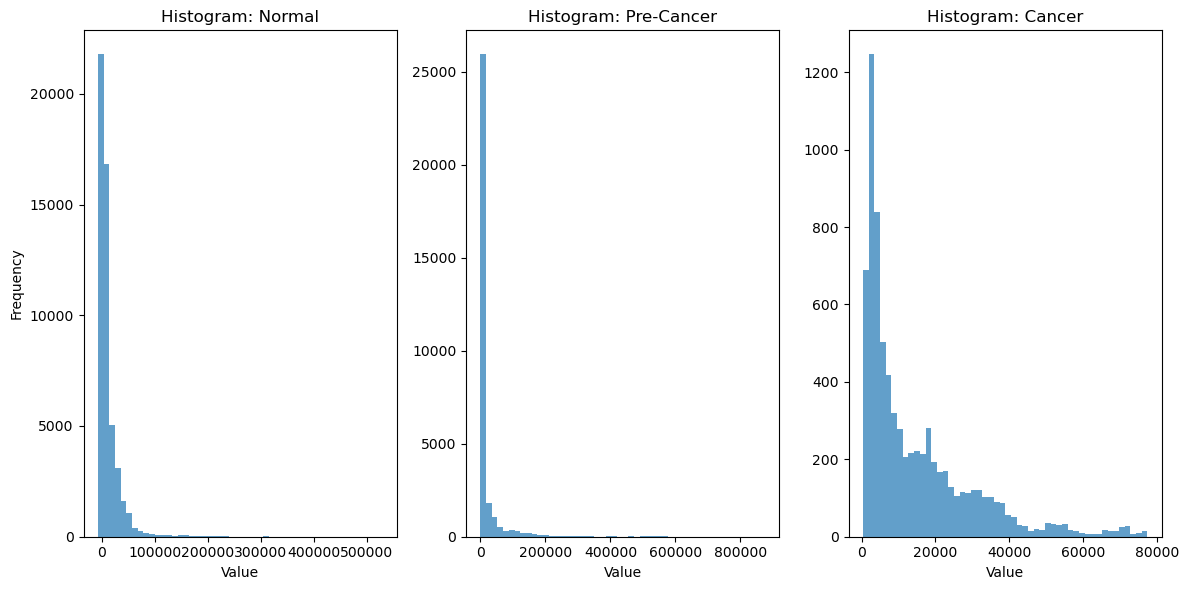

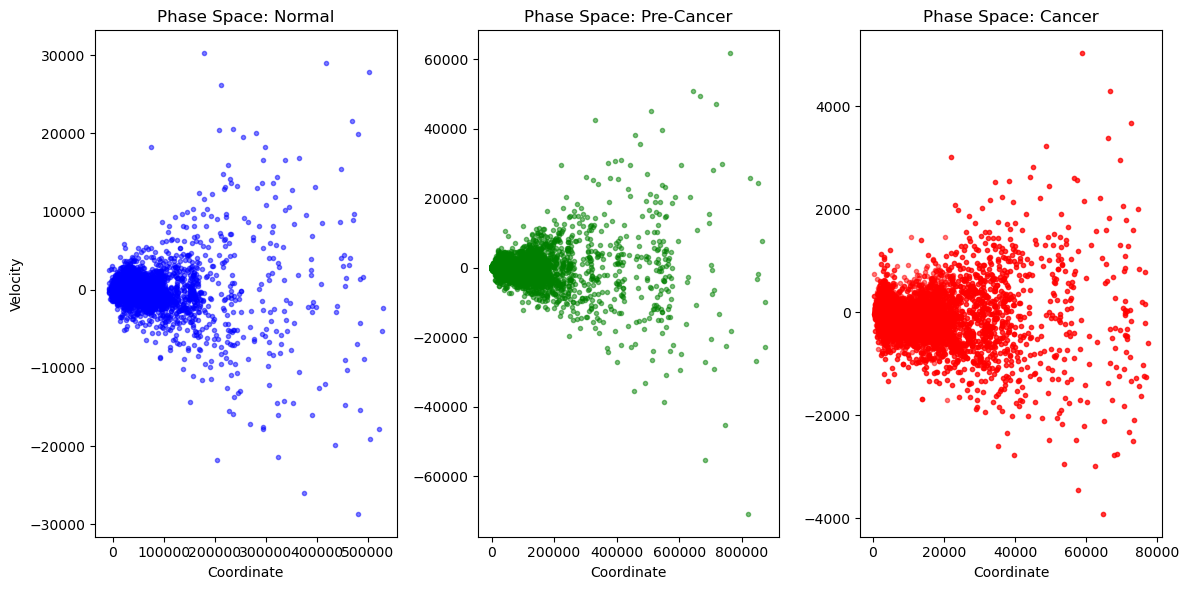

In [ ]:


# Function to calculate phase space (coordinate and velocity)
def phase_space(data):
    coordinates = data[:-1]
    velocities = np.diff(data, axis=0)
    return coordinates[:len(velocities)], velocities

# Calculating phase space for each dataset
normal_coords, normal_vels = phase_space(normal)
precancer_coords, precancer_vels = phase_space(precancer)
cancer_coords, cancer_vels = phase_space(cancer)

# Ploting histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(normal.flatten(), bins=50, alpha=0.7)
plt.title("Histogram: Normal")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(precancer.flatten(), bins=50, alpha=0.7)
plt.title("Histogram: Pre-Cancer")
plt.xlabel("Value")

plt.subplot(1, 3, 3)
plt.hist(cancer.flatten(), bins=50, alpha=0.7)
plt.title("Histogram: Cancer")
plt.xlabel("Value")

plt.tight_layout()
plt.show()

# Ploting phase space behavior
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(normal_coords.flatten(), normal_vels.flatten(), 'b.', alpha=0.5)
plt.title("Phase Space: Normal")
plt.xlabel("Coordinate")
plt.ylabel("Velocity")

plt.subplot(1, 3, 2)
plt.plot(precancer_coords.flatten(), precancer_vels.flatten(), 'g.', alpha=0.5)
plt.title("Phase Space: Pre-Cancer")
plt.xlabel("Coordinate")

plt.subplot(1, 3, 3)
plt.plot(cancer_coords.flatten(), cancer_vels.flatten(), 'r.', alpha=0.5)
plt.title("Phase Space: Cancer")
plt.xlabel("Coordinate")

plt.tight_layout()
plt.show()


In [16]:
print(len(cancer_coords))

229


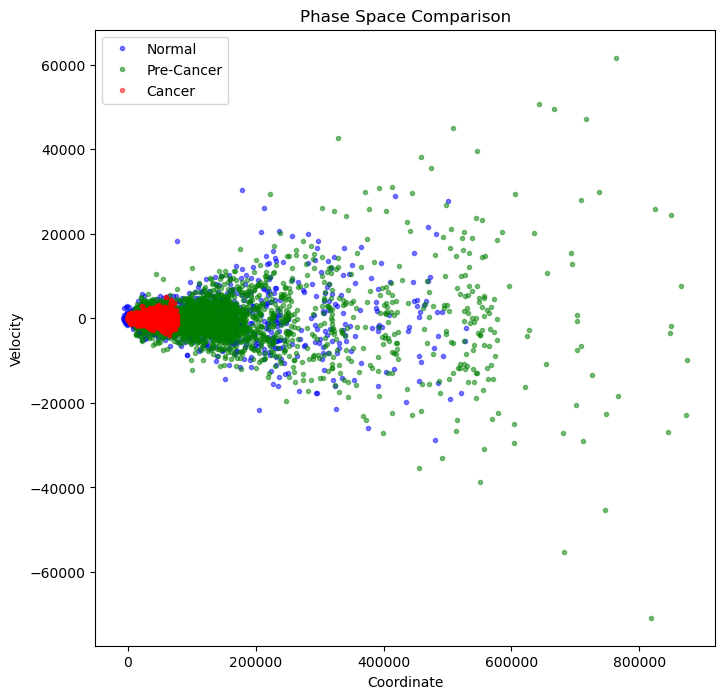

In [ ]:
# Plotting phase space of all three signals in same plot

plt.figure(figsize=(8, 8))

plt.plot(normal_coords.flatten(), normal_vels.flatten(), 'b.', alpha=0.5, label="Normal")
plt.plot(precancer_coords.flatten(), precancer_vels.flatten(), 'g.', alpha=0.5, label="Pre-Cancer")
plt.plot(cancer_coords.flatten(), cancer_vels.flatten(), 'r.', alpha=0.5, label="Cancer")


plt.title("Phase Space Comparison")
plt.xlabel("Coordinate")
plt.ylabel("Velocity")
plt.legend()

plt.show()


In [18]:



num_columns = normal.shape[1] 

# Function to calculate phase space (coordinate and velocity)
def phase_space(data):
    coordinates = data[:-1]  # Exclude last value
    velocities = np.diff(data, axis=0)  # Compute velocity (difference)
    return coordinates[:len(velocities)], velocities

# Function to compute and plot phase space & histogram
def plot_phase_hist(column):
    col_idx = int(column.split('_')[1]) - 1  # Extract column index from name
    
    # Extract column data
    normal_col = normal[:, col_idx]
    precancer_col = precancer[:, col_idx]
    cancer_col = cancer[:, col_idx]

    # Compute phase space
    normal_coords, normal_vels = phase_space(normal_col)
    precancer_coords, precancer_vels = phase_space(precancer_col)
    cancer_coords, cancer_vels = phase_space(cancer_col)

    # Create figure
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 3, 1)
    plt.hist(normal_col, bins=50, alpha=0.7, color='b')
    plt.title(f"Histogram: Normal (Column {col_idx+1})")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.subplot(1, 3, 2)
    plt.hist(precancer_col, bins=50, alpha=0.7, color='g')
    plt.title(f"Histogram: Pre-Cancer (Column {col_idx+1})")
    plt.xlabel("Value")

    plt.subplot(1, 3, 3)
    plt.hist(cancer_col, bins=50, alpha=0.7, color='r')
    plt.title(f"Histogram: Abnormal (Column {col_idx+1})")
    plt.xlabel("Value")

    plt.tight_layout()
    plt.show()

    # Create phase space plot
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.plot(normal_coords, normal_vels, 'b.', alpha=0.5)
    plt.title(f"Phase Space: Normal (Column {col_idx+1})")
    plt.xlabel("Coordinate")
    plt.ylabel("Velocity")

    plt.subplot(1, 3, 2)
    plt.plot(precancer_coords, precancer_vels, 'g.', alpha=0.5)
    plt.title(f"Phase Space: Pre-Cancer (Column {col_idx+1})")
    plt.xlabel("Coordinate")

    plt.subplot(1, 3, 3)
    plt.plot(cancer_coords, cancer_vels, 'r.', alpha=0.5)
    plt.title(f"Phase Space: Abnormal (Column {col_idx+1})")
    plt.xlabel("Coordinate")

    plt.tight_layout()
    plt.show()

# Dropdown widget to select a column
column_dropdown = widgets.Dropdown(
    options=[f"Column_{i+1}" for i in range(num_columns)], 
    description="Column:"
)

# Interactive Output
interactive_plot = widgets.interactive_output(plot_phase_hist, {'column': column_dropdown})

# Display widgets and plot
display(widgets.VBox([column_dropdown, interactive_plot]))


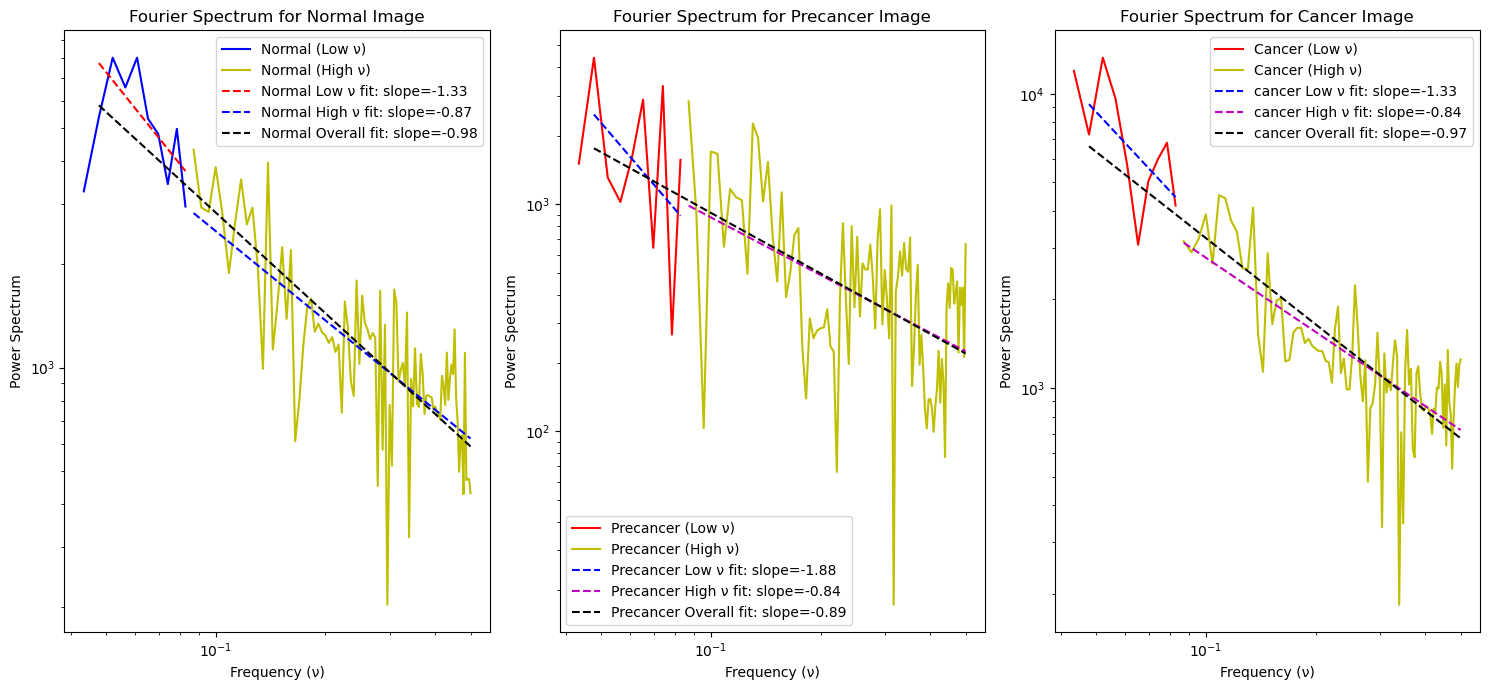

In [ ]:

from scipy.optimize import curve_fit

# Linear function for fitting
def linear_fit(x, a, b):
    return a * x + b

#Fourier magnitudes and frequencies
normal_freqs = fft_normal_freq[10:]  # Normal frequency 
power_spectrum_normal = np.abs(fft_normal_data[10:])  

precancer_freqs = fft_precancer_freq[10:]  # Precancer frequency 
power_spectrum_precancer = np.abs(fft_precancer_data[10:])  

cancer_freqs = fft_cancer_freq[10:]  # Cancer frequency 
power_spectrum_cancer = np.abs(fft_cancer_data[10:]) 

# Converting to log-log space for linear fitting
log_normal_freqs = np.log(normal_freqs[1:])
log_power_spectrum_normal = np.log(power_spectrum_normal[1:])

log_precancer_freqs = np.log(precancer_freqs[1:])
log_power_spectrum_precancer = np.log(power_spectrum_precancer[1:])

log_cancer_freqs = np.log(cancer_freqs[1:])
log_power_spectrum_cancer = np.log(power_spectrum_cancer[1:])

# Spliting index to differentiate low and high frequency ranges
split_idx_normal = len(normal_freqs) // 10

split_idx_precancer = len(precancer_freqs) // 10

split_idx_cancer = len(cancer_freqs) // 10

# Perform linear fits
params_low_normal, _ = curve_fit(linear_fit, log_normal_freqs[:split_idx_normal - 1], log_power_spectrum_normal[:split_idx_normal - 1])
params_high_normal, _ = curve_fit(linear_fit, log_normal_freqs[split_idx_normal - 1:], log_power_spectrum_normal[split_idx_normal - 1:])
params_overall_normal, _ = curve_fit(linear_fit, log_normal_freqs, log_power_spectrum_normal)


params_low_precancer, _ = curve_fit(linear_fit, log_precancer_freqs[:split_idx_precancer - 1], log_power_spectrum_precancer[:split_idx_precancer - 1])
params_high_precancer, _ = curve_fit(linear_fit, log_precancer_freqs[split_idx_precancer - 1:], log_power_spectrum_precancer[split_idx_precancer - 1:])
params_overall_precancer, _ = curve_fit(linear_fit, log_precancer_freqs, log_power_spectrum_precancer)

params_low_cancer, _ = curve_fit(linear_fit, log_cancer_freqs[:split_idx_cancer - 1], log_power_spectrum_cancer[:split_idx_cancer - 1])
params_high_cancer, _ = curve_fit(linear_fit, log_cancer_freqs[split_idx_cancer - 1:], log_power_spectrum_cancer[split_idx_cancer - 1:])
params_overall_cancer, _ = curve_fit(linear_fit, log_cancer_freqs, log_power_spectrum_cancer)

# Plotting power spectrum
plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
plt.loglog(normal_freqs[:split_idx_normal], power_spectrum_normal[:split_idx_normal], 'b', label='Normal (Low ν)')
plt.loglog(normal_freqs[split_idx_normal:], power_spectrum_normal[split_idx_normal:], 'y', label='Normal (High ν)')


plt.loglog(normal_freqs[1:split_idx_normal], np.exp(linear_fit(log_normal_freqs[:split_idx_normal - 1], *params_low_normal)), 'r--', label=f"Normal Low ν fit: slope={params_low_normal[0]:.2f}")
plt.loglog(normal_freqs[split_idx_normal:], np.exp(linear_fit(log_normal_freqs[split_idx_normal - 1:], *params_high_normal)), 'b--', label=f"Normal High ν fit: slope={params_high_normal[0]:.2f}")
plt.loglog(normal_freqs[1:], np.exp(linear_fit(log_normal_freqs, *params_overall_normal)), 'k--', label=f"Normal Overall fit: slope={params_overall_normal[0]:.2f}")
plt.title("Fourier Spectrum for Normal Image")
plt.xlabel("Frequency (ν)")
plt.ylabel("Power Spectrum")
plt.legend()


plt.subplot(1, 3, 2)
plt.loglog(precancer_freqs[:split_idx_precancer], power_spectrum_precancer[:split_idx_precancer], 'r', label='Precancer (Low ν)')
plt.loglog(precancer_freqs[split_idx_precancer:], power_spectrum_precancer[split_idx_precancer:], 'y', label='Precancer (High ν)')

plt.loglog(precancer_freqs[1:split_idx_precancer], np.exp(linear_fit(log_precancer_freqs[:split_idx_precancer - 1], *params_low_precancer)), 'b--', label=f"Precancer Low ν fit: slope={params_low_precancer[0]:.2f}")
plt.loglog(precancer_freqs[split_idx_precancer:], np.exp(linear_fit(log_precancer_freqs[split_idx_precancer - 1:], *params_high_precancer)), 'm--', label=f"Precancer High ν fit: slope={params_high_precancer[0]:.2f}")
plt.loglog(precancer_freqs[1:], np.exp(linear_fit(log_precancer_freqs, *params_overall_precancer)), 'k--', label=f"Precancer Overall fit: slope={params_overall_precancer[0]:.2f}")
plt.title("Fourier Spectrum for Precancer Image")
plt.xlabel("Frequency (ν)")
plt.ylabel("Power Spectrum")
plt.legend()


plt.subplot(1, 3, 3)
plt.loglog(cancer_freqs[:split_idx_cancer], power_spectrum_cancer[:split_idx_cancer], 'r', label='Cancer (Low ν)')
plt.loglog(cancer_freqs[split_idx_cancer:], power_spectrum_cancer[split_idx_cancer:], 'y', label='Cancer (High ν)')

plt.loglog(cancer_freqs[1:split_idx_cancer], np.exp(linear_fit(log_cancer_freqs[:split_idx_cancer - 1], *params_low_cancer)), 'b--', label=f"cancer Low ν fit: slope={params_low_cancer[0]:.2f}")
plt.loglog(cancer_freqs[split_idx_cancer:], np.exp(linear_fit(log_cancer_freqs[split_idx_cancer - 1:], *params_high_cancer)), 'm--', label=f"cancer High ν fit: slope={params_high_cancer[0]:.2f}")
plt.loglog(cancer_freqs[1:], np.exp(linear_fit(log_cancer_freqs, *params_overall_cancer)), 'k--', label=f"cancer Overall fit: slope={params_overall_cancer[0]:.2f}")
plt.title("Fourier Spectrum for Cancer Image")
plt.xlabel("Frequency (ν)")
plt.ylabel("Power Spectrum")
plt.legend()

plt.tight_layout()
plt.show()


c:\Users\Swosti\anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Swosti\anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


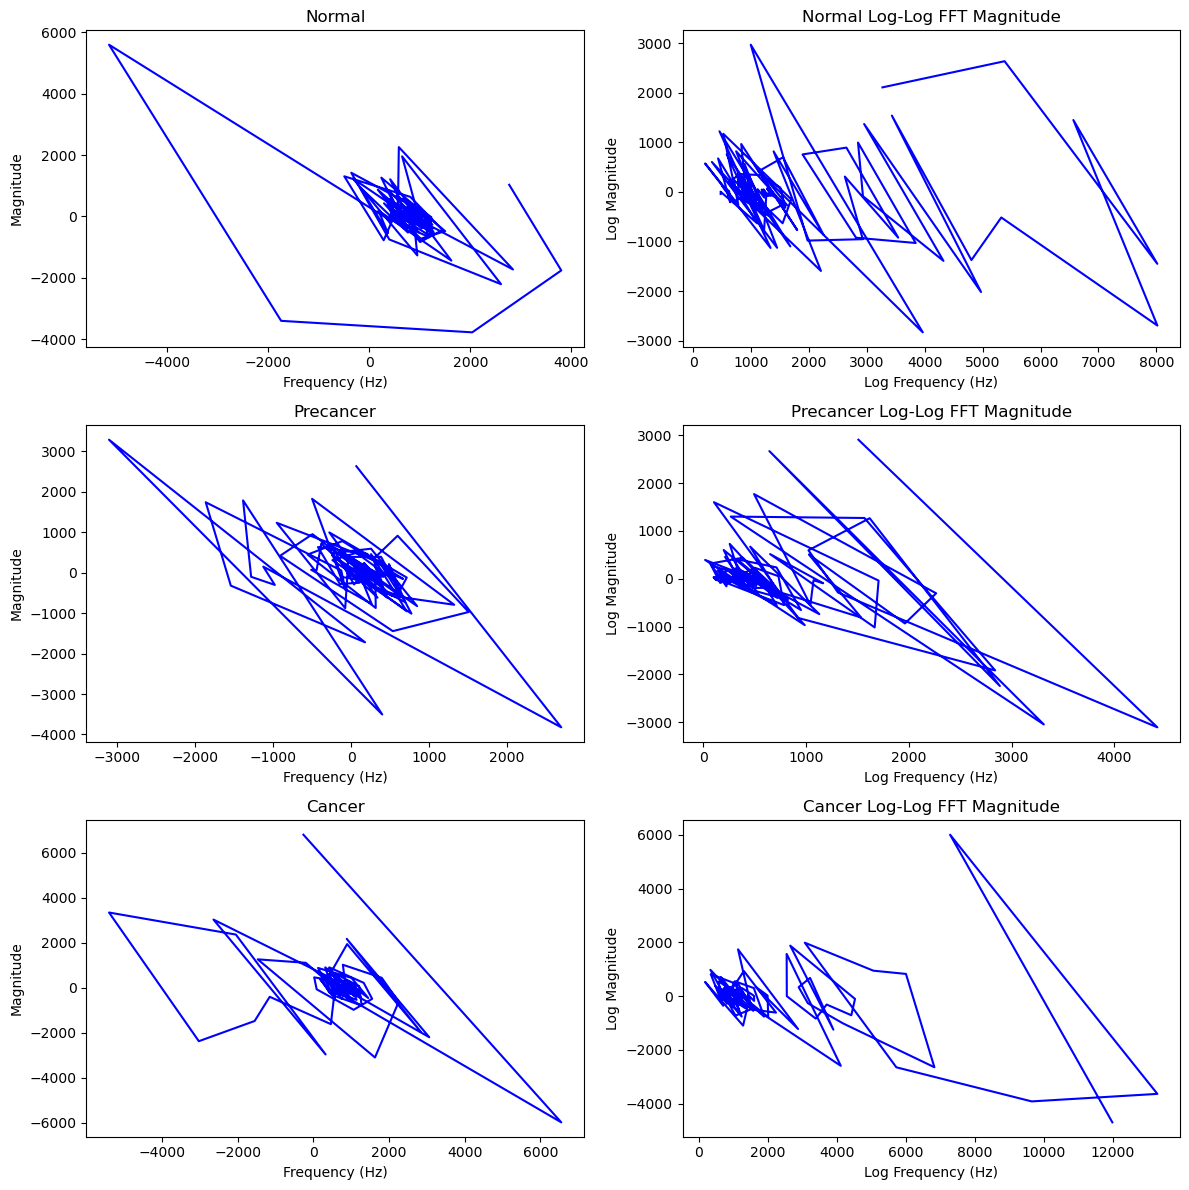

In [20]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

ax[0, 0].plot((fft_normal_data[10:-1]), np.diff((fft_normal_data[10:])), 'b')
ax[0, 0].set_title("Normal")
ax[0, 0].set_xlabel("Frequency (Hz)")
ax[0, 0].set_ylabel("Magnitude")

ax[0, 1].plot((np.abs(fft_normal_data[10:-1])), np.diff(np.abs((fft_normal_data[10:]))), 'b')
ax[0, 1].set_title("Normal Log-Log FFT Magnitude")
ax[0, 1].set_xlabel("Log Frequency (Hz)")
ax[0, 1].set_ylabel("Log Magnitude")

ax[1, 0].plot((fft_precancer_data[10:-1]), np.diff((fft_precancer_data[10:])), 'b')
ax[1, 0].set_title("Precancer")
ax[1, 0].set_xlabel("Frequency (Hz)")
ax[1, 0].set_ylabel("Magnitude")

ax[1, 1].plot((np.abs(fft_precancer_data[10:-1])), np.diff(np.abs((fft_precancer_data[10:]))), 'b')
ax[1, 1].set_title("Precancer Log-Log FFT Magnitude")
ax[1, 1].set_xlabel("Log Frequency (Hz)")
ax[1, 1].set_ylabel("Log Magnitude")

ax[2, 0].plot((fft_cancer_data[10:-1]), np.diff((fft_cancer_data[10:])), 'b')
ax[2, 0].set_title("Cancer")
ax[2, 0].set_xlabel("Frequency (Hz)")
ax[2, 0].set_ylabel("Magnitude")

ax[2, 1].plot((np.abs(fft_cancer_data[10:-1])), np.diff(np.abs((fft_cancer_data[10:]))), 'b')
ax[2, 1].set_title("Cancer Log-Log FFT Magnitude")
ax[2, 1].set_xlabel("Log Frequency (Hz)")
ax[2, 1].set_ylabel("Log Magnitude")


plt.tight_layout()
plt.show()

C:\Users\Swosti\AppData\Local\Temp\ipykernel_4144\1398049802.py:23: RuntimeWarning: divide by zero encountered in log
  ax[0, 1].plot(np.log(fft_shuffle_normal_freq[:]), np.log(np.abs(fft_shuffle_normal_data[:])))


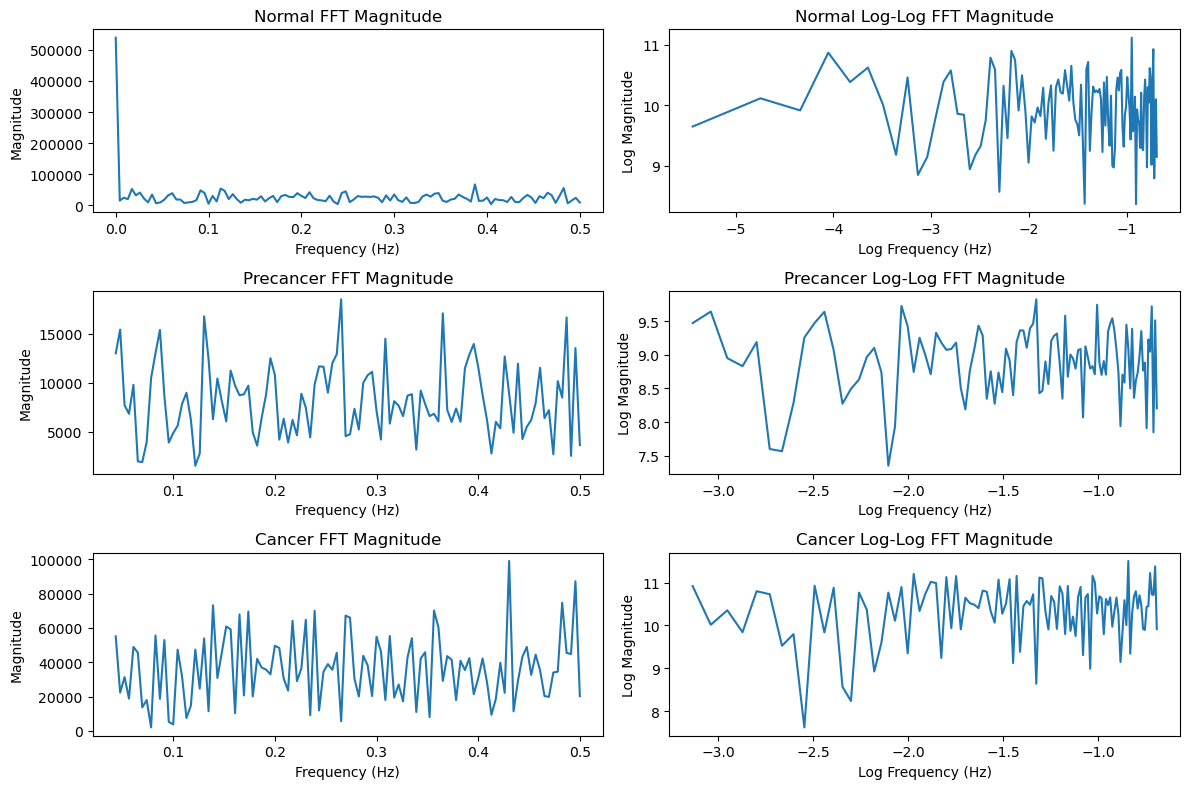

In [21]:
shuffle_normal_data = np.random.permutation(normal[:,1])

shuffle_precancer_data = np.random.permutation(precancer[:,1])

shuffle_cancer_data = np.random.permutation(cancer[:,1])

deltaT=1
fft_shuffle_normal_data= rfft(shuffle_normal_data)
fft_shuffle_normal_freq = rfftfreq(len(shuffle_normal_data), deltaT)

fft_shuffle_precancer_data= rfft(shuffle_precancer_data)
fft_shuffle_precancer_freq = rfftfreq(len(shuffle_precancer_data), deltaT)

fft_shuffle_cancer_data= rfft(shuffle_cancer_data)
fft_shuffle_cancer_freq = rfftfreq(len(shuffle_cancer_data), deltaT)

fig, ax = plt.subplots(3, 2, figsize=(12, 8))
ax[0, 0].plot(fft_shuffle_normal_freq[:], np.abs(fft_shuffle_normal_data[:]))
ax[0, 0].set_title("Normal FFT Magnitude")
ax[0, 0].set_xlabel("Frequency (Hz)")
ax[0, 0].set_ylabel("Magnitude")

ax[0, 1].plot(np.log(fft_shuffle_normal_freq[:]), np.log(np.abs(fft_shuffle_normal_data[:])))
ax[0, 1].set_title("Normal Log-Log FFT Magnitude")
ax[0, 1].set_xlabel("Log Frequency (Hz)")
ax[0, 1].set_ylabel("Log Magnitude")

ax[1, 0].plot(fft_shuffle_precancer_freq[10:], np.abs(fft_shuffle_precancer_data[10:]))
ax[1, 0].set_title("Precancer FFT Magnitude")
ax[1, 0].set_xlabel("Frequency (Hz)")
ax[1, 0].set_ylabel("Magnitude")

ax[1, 1].plot(np.log(fft_shuffle_precancer_freq[10:]), np.log(np.abs(fft_shuffle_precancer_data[10:])))
ax[1, 1].set_title("Precancer Log-Log FFT Magnitude")
ax[1, 1].set_xlabel("Log Frequency (Hz)")
ax[1, 1].set_ylabel("Log Magnitude")

ax[2, 0].plot(fft_shuffle_cancer_freq[10:], np.abs(fft_shuffle_cancer_data[10:]))
ax[2, 0].set_title("Cancer FFT Magnitude")
ax[2, 0].set_xlabel("Frequency (Hz)")
ax[2, 0].set_ylabel("Magnitude")

ax[2, 1].plot(np.log(fft_shuffle_cancer_freq[10:]), np.log(np.abs(fft_shuffle_cancer_data[10:])))
ax[2, 1].set_title("Cancer Log-Log FFT Magnitude")
ax[2, 1].set_xlabel("Log Frequency (Hz)")
ax[2, 1].set_ylabel("Log Magnitude")

plt.tight_layout()
plt.show()